<a href="https://colab.research.google.com/github/Nirob-0812/Colab_Notebooks/blob/main/Age_And_Gender_Detection/age_and_gender_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import cv2
import matplotlib.pyplot as plt

In [100]:
#import images
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Project/Age and Gender Detection/Images/test2.jpg")
image=cv2.resize(image,(720,640))

In [101]:
#import models
face1="/content/drive/MyDrive/Colab Notebooks/Project/Age and Gender Detection/Models/opencv_face_detector.pbtxt"
face2="/content/drive/MyDrive/Colab Notebooks/Project/Age and Gender Detection/Models/opencv_face_detector_uint8.pb"
age1="/content/drive/MyDrive/Colab Notebooks/Project/Age and Gender Detection/Models/age_deploy.prototxt"
age2="/content/drive/MyDrive/Colab Notebooks/Project/Age and Gender Detection/Models/age_net.caffemodel"
gender1="/content/drive/MyDrive/Colab Notebooks/Project/Age and Gender Detection/Models/gender_deploy.prototxt"
gender2="/content/drive/MyDrive/Colab Notebooks/Project/Age and Gender Detection/Models/gender_net.caffemodel"

In [102]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
face=cv2.dnn.readNet(face2,face1)
age=cv2.dnn.readNet(age2,age1)
gender=cv2.dnn.readNet(gender2,gender1)

In [103]:
# Category distribution
la = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
	'(25-32)', '(38-43)', '(48-53)', '(60-100)']
lg = ['Male', 'Female']

In [104]:
img=image.copy()

In [105]:
img_h=img.shape[0]
img_w=img.shape[1]
blob=cv2.dnn.blobFromImage(img,1.0,(300,300),[104,117,123],True,False)
face.setInput(blob)
detections=face.forward()

In [106]:
# Face bounding box creation
faceBoxes = []
for i in range(detections.shape[2]):

	#Bounding box creation if confidence > 0.7
	confidence = detections[0, 0, i, 2]
	if confidence > 0.7:

		x1 = int(detections[0, 0, i, 3]*img_w)
		y1 = int(detections[0, 0, i, 4]*img_h)
		x2 = int(detections[0, 0, i, 5]*img_w)
		y2 = int(detections[0, 0, i, 6]*img_h)

		faceBoxes.append([x1, y1, x2, y2])

		cv2.rectangle(img, (x1, y1), (x2, y2),(0, 255, 0), int(round(img_h/150)), 8)

faceBoxes


[[252, 141, 482, 359]]

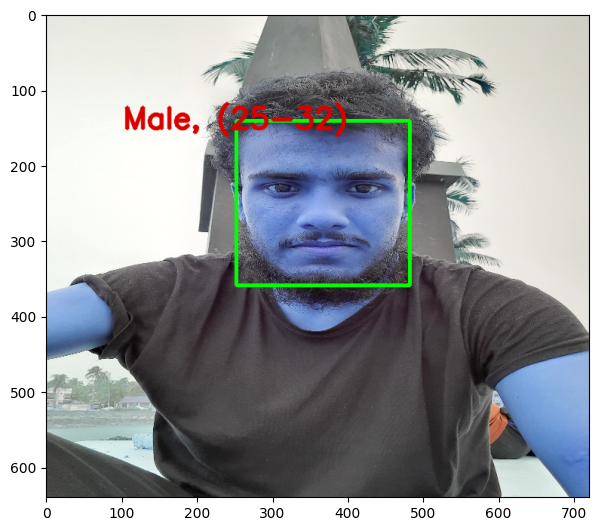

In [107]:
# Checking if face detected or not
if not faceBoxes:
	print("No face detected")

# Final results (otherwise)
# Loop for all the faces detected
for faceBox in faceBoxes:

	#Extracting face as per the faceBox
	face = img[max(0, faceBox[1]-15):
				min(faceBox[3]+15, img.shape[0]-1),
max(0, faceBox[0]-15):min(faceBox[2]+15,img.shape[1]-1)]

	#Extracting the main blob part
	blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

	#Prediction of gender
	gender.setInput(blob)
	genderPreds = gender.forward()
	gender = lg[genderPreds[0].argmax()]

	#Prediction of age
	age.setInput(blob)
	agePreds = age.forward()
	age = la[agePreds[0].argmax()]

	#Putting text of age and gender
	#At the top of box
	cv2.putText(img,
				f'{gender}, {age}',
				(faceBox[0]-150, faceBox[1]+10),
				cv2.FONT_HERSHEY_SIMPLEX,
				1.3,
				(217, 0, 0),
				4,
				cv2.LINE_AA)

	plt.figure(figsize=(7, 7))
	plt.imshow(img)
